<h1>Linear Algebra Pt. III</h1>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<h2>Vector Viz</h2>

In [2]:
v1 = np.array([2,5])
v2 = np.array([3,2])

In [3]:
def vector_viz(vecs, cols, alpha = 1):
    plt.figure()
    plt.axvline(x=0,color="grey", zorder=0)
    plt.axhline(y=0,color="grey", zorder=0)
    
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles = 'xy', scale_units='xy', scale=1,
                   color=cols[i],
                   alpha=alpha
                  )

(-1.0, 8.0)

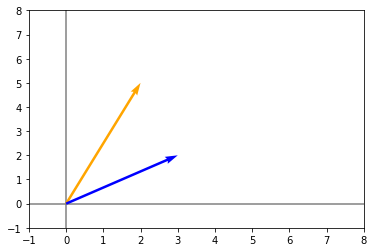

In [4]:
vector_viz([v1,v2],['orange','blue'])
plt.xlim(-1,8)
plt.ylim(-1,8)

<h2>Linear Combination</h2>
<p>V1 x 2 + V2 x 3 = V1V2</p>

In [7]:
v1 = np.array([2,5])
v2 = np.array([3,2])

In [12]:
v1v2 = 2*v1 + 1*v2

In [13]:
v1v2

array([ 7, 12])

(-1.0, 12.0)

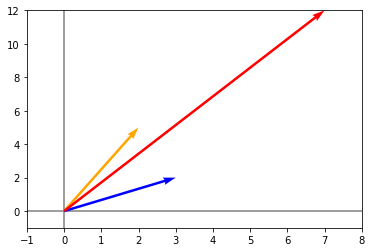

In [15]:
vector_viz([v1,v2,v1v2], ["orange","blue","red"])
plt.xlim(-1,8)
plt.ylim(-1,12)

<h3>With the linear combination of two vectors a whole R2 space can be described</h3>

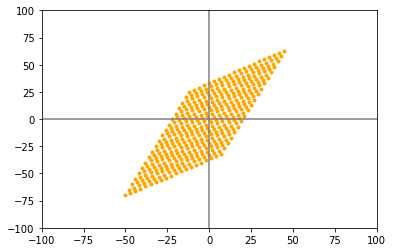

In [16]:
for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker='.',
                   color="orange")
plt.xlim(-100,100)
plt.ylim(-100,100)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

<h2>Spaces & subspaces</h2>

In [17]:
%matplotlib notebook

In [18]:
v1 = np.array([1,1])
v2 = np.array([-1,-1])

<IPython.core.display.Javascript object>


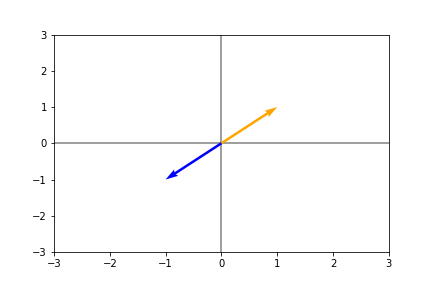

(-3.0, 3.0)

In [22]:
vector_viz([v1,v2],['orange','blue'])
plt.xlim(-3,3)
plt.ylim(-3,3)

<IPython.core.display.Javascript object>


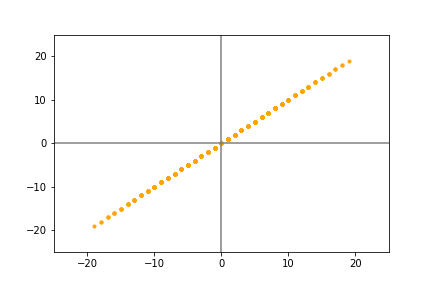

In [20]:
for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker='.',
                   color="orange")
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

In [23]:
v1 = np.array([1,0])
v2 = np.array([2,-3])

<IPython.core.display.Javascript object>


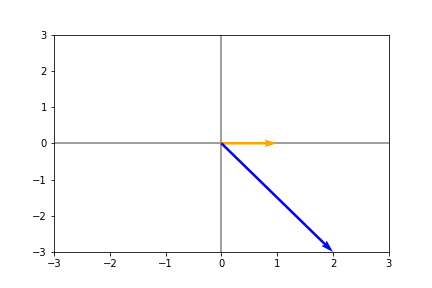

(-3.0, 3.0)

In [25]:
vector_viz([v1,v2],['orange','blue'])
plt.xlim(-3,3)
plt.ylim(-3,3)

<IPython.core.display.Javascript object>


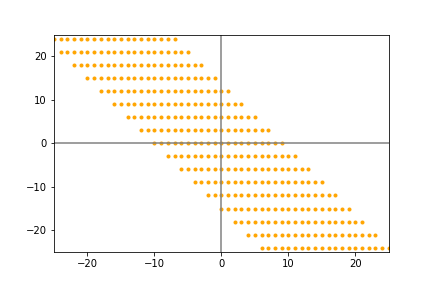

In [24]:
for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker='.',
                   color="orange")
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

<h3>R2 is a subspace of R3 and so on</h3>

In [26]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([1,0,0])
v2 = np.array([-2,3,0])

<h3>We get a hyperplane (subspace)</h3>

<IPython.core.display.Javascript object>


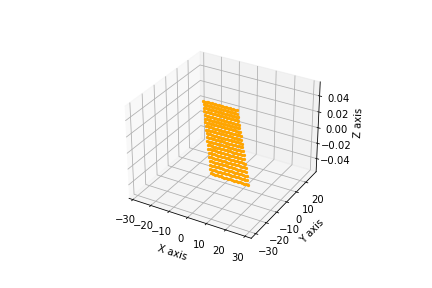

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for a in range(-10,10):
    for b in range(-10,10):
        ax.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   v1[2]*a + v2[2]*b,
                   marker='.',
                   color="orange")
        
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

<h2>Linearly Independent Vectors</h2>

In [5]:
%matplotlib inline

In [6]:
v1 = np.array([1,1])
v2 = np.array([-1,-1])

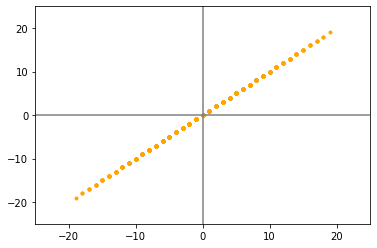

In [9]:
for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker='.',
                   color='orange')

plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

<p>v2 depends on v1</p>

In [10]:
print(v1 == -1 * v2)

[ True  True]


<h2>Check whether a matrix has inverse</h2>
<ul>
    <li>It should be square</li>
    <li>All vectors linearly independent</li>
</ul>

In [11]:
A = np.array(
    [
        [0,1,0,0],
        [0,0,1,0],
        [0,1,1,0],
        [1,0,0,1]
    ]
)
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

<h3>Eigen-vector & Eigen-values</h3>
<p>Decompose the matrix</p>
<p>V3[0 1 1 0] = V1[0,1,0,0] + V2[0,0,1,0]</p>
<p>3rd vector is linearly dependent</p>
<p>Also: col1 == col4</p>

In [12]:
lambdas, V = np.linalg.eig(A.T)
print(A[lambdas == 0, :])

[[0 1 1 0]]


<p><b>Matrix has a linearly dependent vector</b><p>

In [13]:
np.linalg.inv(A)

LinAlgError: Singular matrix

<h2>Norm & Triangular Inequality</h2>
<p>Size of a vector, norm(vector) >= 0, ex: distance</p>
<p>norm(vector)= 0 if only if vector = 0</p>
<br>
<p><b>Triangular Inequality</b></p>
<p>v3 = v1 + v2</p>
<p>norm(v3) <= norm(v1) + norm(v2)</p>
<p>norm(Scalar * v) = abs(Scalar) * norm(v)</p>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
v1 = np.array([2,7])
v2 = np.array([3,5])

In [20]:
v1v2 = v1 + v2
v1v2

array([ 5, 12])

In [21]:
np.linalg.norm(v1v2)

13.0

In [26]:
#norm(v1v2) <= norm(v1) + norm(v2)

norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)
norm_v1v2 = np.linalg.norm(v1v2)

print(norm_v1)
print(norm_v2)
print(norm_v1v2)

7.280109889280518
5.830951894845301
13.0


In [25]:
norm_v1 + norm_v2

13.11106178412582

In [28]:
# 13.0 <= 13.11106178412582
print(norm_v1v2 <= (norm_v1 + norm_v2))

True


In [30]:
v1 = np.array([0,0,2,7])
v2 = np.array([0,0,3,5])

v1_aux = np.array([v1[2],v1[3],v2[2],v2[3]])
v1v2 = np.array([0,0,5,12])

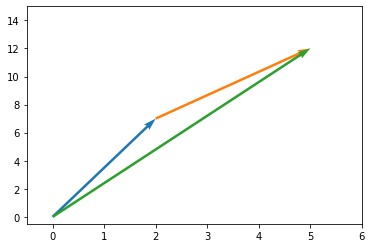

In [33]:
plt.quiver([v1[0], v1_aux[0], v1v2[0]],
           [v1[1], v1_aux[1], v1v2[1]],
           [v1[2], v1_aux[2], v1v2[2]],
           [v1[3], v1_aux[3], v1v2[3]],
           angles='xy', scale_units='xy', scale = 1,
           color = sns.color_palette()
          )

plt.xlim(-0.5,6)
plt.ylim(-0.5,15)
plt.show()

<h2>Norm 0,1,2, infinite & norm L2 to square</h2>
<p><b>L0: Number of elements in V <> 0</b></p>

In [35]:
v = np.array([1,2,0,5,6,0])
print(np.linalg.norm(v,ord=0))

4.0


$L1 = \sum \limits _{i=1} abs(Vi) $

In [36]:
v = np.array([1,-1,1,-1,1])
print(np.linalg.norm(v,ord=1))

5.0


<p><b>L2 = (euclidian distance) = origin-vector</b></p>

In [37]:
#L2 is default
v = np.array([1,1])
print(np.linalg.norm(v))
print(np.linalg.norm(v,ord=2))

1.4142135623730951
1.4142135623730951


<p>For example</p>$(L2)^{2} = x.dot(x^{T})$ 

In [38]:
v = np.array([1,2,3,4,5,6])
print(np.linalg.norm(v,ord=2)**2)

91.0


In [40]:
print(v.T.dot(v))

91


<p><b>L(infinite): Max(abs(v))</b></p>

In [42]:
v = np.array([1,2,3,-100])
print(np.linalg.norm(v,ord=np.inf))

100.0


<h2>Internal Product as a norm function</h2>
<br>
$V1^T*V2 = L2(V1) * L2(V2) * COS(angle)$

In [3]:
v1 = np.array([0,0,0,3])
v2 = np.array([0,0,3,3])

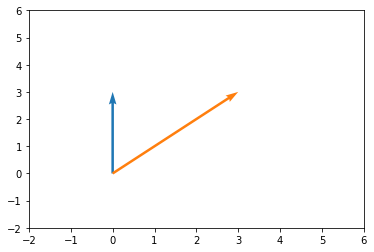

In [5]:
plt.xlim(-2,6)
plt.ylim(-2,6)

plt.quiver([v1[0], v2[0]],
           [v1[1], v2[1]],
           [v1[2], v2[2]],
           [v1[3], v2[3]],
           angles = 'xy', scale_units ='xy', scale = 1,
           color = sns.color_palette()
)

plt.show()

In [6]:
v1 = np.array([0,3])
v2 = np.array([3,3])

v1.T.dot(v2)

9

<p><b>This works for COS similarity (text analysis & similarity)</b></p>

In [8]:
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)

print(norm_v1 * norm_v2 * np.cos(np.deg2rad(45)))

9.0
